<a href="https://colab.research.google.com/github/fabnancyuhp/RENDUPYTHONISFSTAT/blob/master/Exercise_Chapitre_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice : Machine learning sur le le dataset contraceptive-method-choice

Dans cette section on applique la régression logistique et l'arbre aléatoire au dataset travel insurance. Dans une premiere partie on manipule les données. Vous devez executer les cellule tout en lisant attentivement cette partie. Il faudrat comprendre cette dernière pour pouvoir fair le projet.<br>
Le dataset vient du site kaggle : https://www.kaggle.com/faizunnabi/contraceptive-method-choice.<br> 
Vous pouvez charger les données en suivant ce lien: https://1drv.ms/t/s!Am09h0q2OIX0ccOvloeR-pTUI1Y?e=y2pPgL

### Manipulation des données 
Dans ce dataset nous avons les variables suivantes:
 1. Wife's age (numerical)
 2. Wife's education (categorical) 1=low, 2, 3, 4=high
 3. Husband's education (categorical) 1=low, 2, 3, 4=high
 4. Number of children ever born (numerical)
 5. Wife's religion (binary) 0=Non-Islam, 1=Islam
 6. Wife's now working? (binary) 0=Yes, 1=No
 7. Husband's occupation (categorical) 1, 2, 3, 4
 8. Standard-of-living index (categorical) 1=low, 2, 3, 4=high
 9. Media exposure (binary) 0=Good, 1=Not good
 10. Contraceptive method used (class attribute) 1=No-use ,2=Long-term,3=Short-term
 
La variable Contraceptive method used est la variable que l'on veut prédire  

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, auc, roc_curve

Manipulation des données (preprocessing)

In [0]:
NON_VAR = ['WIFE_AGE', 'WIFE_EDU', 'HUSB_EDU', 'NUM_OF_CHILD',
           'WIFE_RELI', 'WIFE_WORK', 'HUSB_OCUP', 'STA_OF_LIV',
           'MEDIA_EXP', 'CONTRACEPTIVE']

donnee = pd.read_csv("/Users/danielhaik/Desktop/cmc.data.txt",
                     sep=",", header=None, names=NON_VAR)

donnee['CONTRACEPTIVE'].value_counts()

features = [o for o in donnee.columns if o != 'CONTRACEPTIVE']

X = donnee[features]

Y = donnee['CONTRACEPTIVE']

Y_red = np.where(Y == 1, 0, 1)

a_dummies = ['WIFE_EDU', 'HUSB_EDU', 'HUSB_OCUP', 'STA_OF_LIV']

for var in a_dummies:
    X.loc[:, var] = X.loc[:, var].copy().astype(str)

X_dum = pd.get_dummies(X[a_dummies])

A_garder = [var for var in list(X) if var not in a_dummies]
X = X[A_garder]

X = pd.concat([X, X_dum], axis=1)

/Users/danielhaik/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Exercice 1 : régression logistique sur les données contraceptive-method-choice
On utilise X et Y_red: X est l'ensembles des features (variables explicatives). Y_red est la target value, c'est à dire la variable que l'on veut prédire

1/ Diviser en échantillon d'apprentissage et de test. On utilisera train_test_split comme dans l'exemple ci-dessus. On prendra l'option random_state=1998. L'échantillon dapprentissage s'appelle X_train, Y_train et celui de test s'appelle X_test, Y_test.

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_red,
                                                    random_state=1998,
                                                    test_size=0.3)

2/ Appeler un modèle de régression logistique, avec les parametre suivants:
* penalty='l2'
* solver='lbfgs'
* C=1/2
* max_iter=1000

Ce medèle s'appelle logit1

In [0]:
clf = LogisticRegression(penalty='l2', solver='lbfgs', C=1/2,
                         max_iter=1000)

3/Entrainer le moèle logit1 avec les données X_train et Y_train.

In [0]:
clf.fit(X_train, Y_train)


LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

4/ Faite la prévision Y_pred que logit1 produit avec X_test. 

In [0]:
Y_pred = clf.predict(X_test)

5/ Calculer la précision du modèle logit1 sur les données de test.

In [0]:
accuracy_score(Y_test, Y_pred)

0.665158371040724

6/Calculer la matrice de confusion de logit1 sur les donnée X_test, Y_test.

In [0]:
confusion_matrix(Y_test, Y_pred)

array([[ 90, 101],
       [ 47, 204]])

7/Calculer les prévisions en probabilité du modèle sur les données X_test.

In [0]:
Y_pred_prob = clf.predict_proba(X_test)

8/Calculer le score AUC du modèle logit1 sur les données.

In [0]:
score_auc = roc_auc_score(Y_test, Y_pred_prob[:, 1])

9/ tracer la cource ROC de logit1 sur les données X_test, Y_test

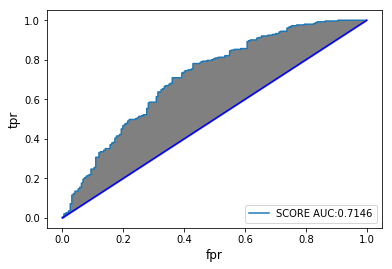

In [0]:
fpr, tpr, threshold = roc_curve(Y_test, Y_pred_prob[:, 1])

plt.plot(fpr, tpr, label='SCORE AUC:'+str(np.round(auc(fpr, tpr), 4)))
plt.plot([0, 1], [0, 1], color='blue')
plt.ylabel("tpr", fontsize='large')
plt.xlabel('fpr', fontsize='large')
plt.fill_between(fpr, fpr, tpr, color='grey')
plt.legend(loc=4)
plt.show()

### Exercice 2 : arbre de décision

1/ Diviser en échantillon d'apprentissage et de test. On utilisera train_test_split comme dans l'exemple ci-dessus. On prendra l'option random_state=1998. L'échantillon dapprentissage s'appelle X_train, Y_train et celui de test s'appelle X_test, Y_test.

2/ Faire un modele d'arbre de décision sklearn.tree.DecisionTreeClassifier. Ce modele s'appelle arbre.

In [0]:
from sklearn.tree import DecisionTreeClassifier
arbre = DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_split=2)

3/ Entrainer le modèle arbre avec les données X_train et Y_train 

In [0]:
arbre.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

4/ Calculer les prédictions Y_pred du modèle arbre sur les données X_test. 

In [0]:
Y_pred_arbre = arbre.predict(X_test)

5/ Calculer la précision du modèle arbre sur les données X_test et Y_test

In [0]:
score_arbre = accuracy_score(Y_test, Y_pred_arbre)
score_arbre

0.6968325791855203

6/ Faire un modèle d'arbre de décision arbrebis avec les paramètre suivants
* random_state=1998
* criterion='gini'
* max_depth=9
* min_samples_split=4
* min_samples_leaf=3
En trainer ce modèle

In [0]:
arbrebis = DecisionTreeClassifier(random_state=1998, criterion="gini", max_depth=9,
                                  min_samples_split=4, min_samples_leaf=3)
arbrebis.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1998,
            splitter='best')

7/Calculer la précision du modèle sur les données X_test et Y_test.

In [0]:
Y_pred_arbrebis = arbrebis.predict(X_test)
score_arbrebis = accuracy_score(Y_test, Y_pred_arbrebis)

8/ Calculer la prédiction en probabilité du modèle arbrebis sur X_test, Y_test.

In [0]:
Y_pred_proba_arbrebis = arbrebis.predict_proba(X_test)

9/ Caluler le score AUC du modèle arbrebis sur les données X_test et Y_test.

In [0]:
score_auc_arbrebis = roc_auc_score(Y_test, Y_pred_proba_arbrebis[:, 1])

10/ Faire la courbe roc du modèle arbrebis

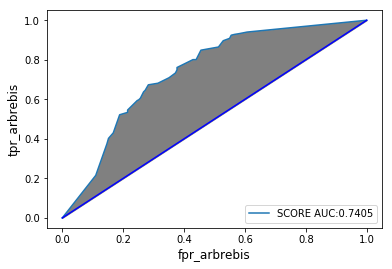

In [0]:
fpr_arbrebis, tpr_arbrebis, threshold_2 = roc_curve(Y_test, Y_pred_proba_arbrebis[:, 1])

plt.plot(fpr_arbrebis, tpr_arbrebis, label='SCORE AUC:'+str(np.round(auc(fpr_arbrebis, tpr_arbrebis), 4)))
plt.plot([0, 1], [0, 1], color='blue')
plt.ylabel("tpr_arbrebis", fontsize='large')
plt.xlabel('fpr_arbrebis', fontsize='large')
plt.fill_between(fpr_arbrebis, fpr_arbrebis, tpr_arbrebis, color='grey')
plt.legend(loc=4)
plt.show()

11/Ilustrer l'importance des features par un diagramme en baton. On gardera les 15 features les plus importants.

<function matplotlib.pyplot.show(*args, **kw)>

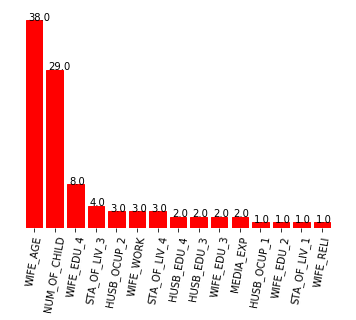

In [0]:
NON_FEATURES = X_train.columns

import numpy as np
IMPORTANCE_FEATURES = 100*np.round(arbrebis.feature_importances_,2)
loca = np.arange(len(IMPORTANCE_FEATURES))

index = np.argsort(IMPORTANCE_FEATURES)[::-1]

#on ordonne 
IMPORTANCE_FEATURES = IMPORTANCE_FEATURES[index][0:15]
NON_FEATURES = NON_FEATURES[index][0:15]
loca  = loca[0:15]

import matplotlib.pyplot as plt
plt.bar(loca,IMPORTANCE_FEATURES,edgecolor='red',color='red')
plt.yticks([])
plt.xticks(loca,NON_FEATURES,color='black',rotation=80)
plt.box(False)
for i in range(0,len(NON_FEATURES)):
    plt.text(loca[i]-0.3,IMPORTANCE_FEATURES[i],str(np.round(IMPORTANCE_FEATURES[i],1)))
plt.show

### Exercice 3 : random forest sur les données contraceptive-method-choice

1/ Faire un modèle de random forest randfo de la manière suivante:
* criterion='gini'
* random_state=1998
* la profondeur de chaques arbre est 9
* min_samples_split=3
* min_samples_leaf=2
* max_features=0.7
Entrainer le modèle randfo avec les données X_train et Y_train

In [0]:
from sklearn.ensemble import RandomForestClassifier

randfo = RandomForestClassifier(criterion="gini", random_state=1998, max_depth=9,
                                min_samples_split=3, min_samples_leaf=2,
                                max_features=0.7)
randfo.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features=0.7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1998, verbose=0,
            warm_start=False)

2/Donner une interpretation du paramètre max_features.

En indiquant max_features=0.7 l'algorithme sélectionne 70% de toutes les features pour diviser les noeuds l'arbre, ici il y a 21 features, il en selectionne donc aléatoirement 15 pour spliter les noeuds.

In [0]:
randfo.n_features_

21

3/ Calculer la précision randfo sur X_test et Y_test.

In [0]:
Y_pred_randfo = randfo.predict(X_test)
score_randfo = accuracy_score(Y_test, Y_pred_randfo)
score_randfo

0.7217194570135747

4/ Calculer le score AUC de randfo sur X_test et Y_test.

In [0]:
Y_pred_proba_randfo = randfo.predict_proba(X_test)
score_auc_randfo = roc_auc_score(Y_test, Y_pred_proba_randfo[:, 1])
score_auc_randfo

0.7885943138441

The best model for this data set seems to be the Random Forest qui a la meilleure précision
